In [2]:
# After Data clean up

%pylab inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
files.upload()

Saving salary_data_cleaned.csv to salary_data_cleaned (1).csv


{'salary_data_cleaned.csv': b'Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age,python_yn,R_yn,aws,excel\nData Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor\xe2\x80\x99s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor\xe2\x80\x99s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years\xe2\x80\x99 experience credit for Master\xe2\x80\x99s degree; five years\xe2\x80\x99 experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorith

In [4]:
df = pd.read_csv('salary_data_cleaned.csv')

In [5]:
df.head()

Job Title              Salary Estimate  ... aws  excel
0             Data Scientist   $53K-$91K (Glassdoor est.)  ...   0      1
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)  ...   0      0
2             Data Scientist   $80K-$90K (Glassdoor est.)  ...   0      1
3             Data Scientist   $56K-$97K (Glassdoor est.)  ...   0      0
4             Data Scientist  $86K-$143K (Glassdoor est.)  ...   0      1

[5 rows x 27 columns]

In [6]:
# Write functions to parse the description
# Job title and seniority

def title_simplfier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'research' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'


In [7]:
df['job_simpl'] = df['Job Title'].apply(title_simplfier)
df.job_simpl.value_counts()

data scientist    279
na                165
analyst           128
data engineer     119
manager            22
mle                15
director           14
Name: job_simpl, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [9]:
# Fix 'Los Angeles' state

df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 UT              10
 WI              10
 IN              10
 AZ               9
 MO               9
 AL               8
 DE               6
 KY               6
 GA               6
 MI               6
 IA               5
 CT               5
 NE               4
 LA               4
 OR               4
 KS               3
 NM               3
 MN               2
 ID               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [10]:
df.job_state = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
IN     10
UT     10
MO      9
AZ      9
AL      8
MI      6
KY      6
DE      6
GA      6
IA      5
CT      5
OR      4
LA      4
NE      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'aws', 'excel', 'job_simpl', 'seniority'],
      dtype='object')

In [12]:
# Job Description length

df['desc_length'] = df['Job Description'].apply(lambda x: len(x))
df.head()

Job Title  ... desc_length
0             Data Scientist  ...        2536
1  Healthcare Data Scientist  ...        4783
2             Data Scientist  ...        3461
3             Data Scientist  ...        3883
4             Data Scientist  ...        2728

[5 rows x 30 columns]

In [13]:
# Competitor counts

df['num_comp'] = df.Competitors.apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df.head()

Job Title  ... num_comp
0             Data Scientist  ...        0
1  Healthcare Data Scientist  ...        0
2             Data Scientist  ...        0
3             Data Scientist  ...        3
4             Data Scientist  ...        3

[5 rows x 31 columns]

In [15]:
# Convert hourly to yearly salary

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [16]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]


hourly  min_salary  max_salary
165       1          34          48
177       1          42          68
197       1          36          50
202       1          42          68
210       1          30          50
246       1          34          48
271       1          42          68
337       1          36          50
345       1          48          78
357       1          42          68
363       1          50          56
408       1          42          58
409       1          20          34
492       1          36          50
509       1          48          78
533       1          42          68
542       1          50          56
617       1          42          58
618       1          20          34
645       1          54          94
666       1          36          50
682       1          48          78
711       1          42          68
724       1          50          56

In [17]:
df.company_text = df.company_text.apply(lambda x: x.replace('\n', ''))
df.company_text

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

In [18]:
df.describe()

Rating      Founded  ...   desc_length    num_comp
count  742.000000   742.000000  ...    742.000000  742.000000
mean     3.618868  1837.154987  ...   3869.545822    1.053908
std      0.801210   497.183763  ...   1521.495868    1.384239
min     -1.000000    -1.000000  ...    407.000000    0.000000
25%      3.300000  1939.000000  ...   2801.000000    0.000000
50%      3.700000  1988.000000  ...   3731.000000    0.000000
75%      4.000000  2007.000000  ...   4740.000000    3.000000
max      5.000000  2019.000000  ...  10051.000000    4.000000

[8 rows x 15 columns]

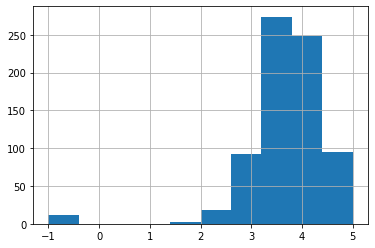

In [19]:
df.Rating.hist()

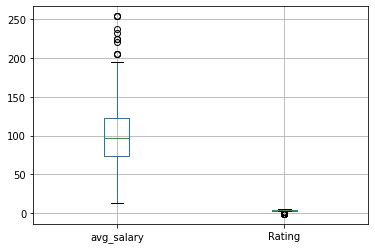

In [20]:
df.boxplot(column=['avg_salary', 'Rating'])

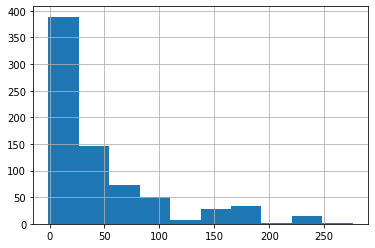

In [21]:
df.age.hist()

In [22]:
corr = df[['age', 'avg_salary', 'Rating', 'desc_length', 'num_comp']].corr()
corr

age  avg_salary    Rating  desc_length  num_comp
age          1.000000    0.019655  0.021655     0.163911  0.126687
avg_salary   0.019655    1.000000  0.013492     0.078808  0.093813
Rating       0.021655    0.013492  1.000000    -0.012281  0.027190
desc_length  0.163911    0.078808 -0.012281     1.000000  0.104620
num_comp     0.126687    0.093813  0.027190     0.104620  1.000000

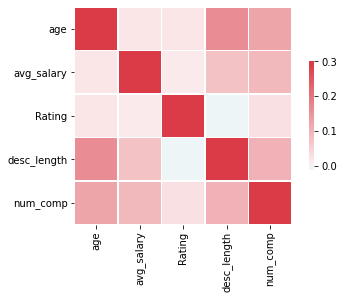

In [23]:
# import numpy as np

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [24]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'same_state', 'python_yn', 'R_yn',
       'aws', 'excel', 'job_simpl', 'seniority', 'company_text']]

Graph for Location: total = 200


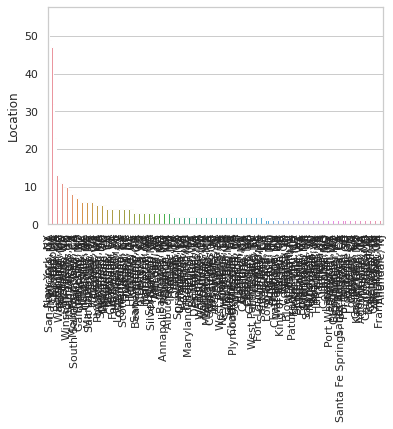

Graph for Headquarters: total = 198


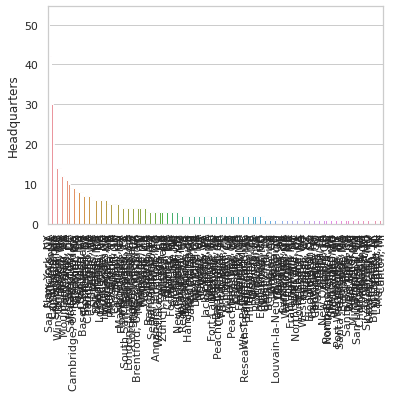

Graph for Size: total = 9


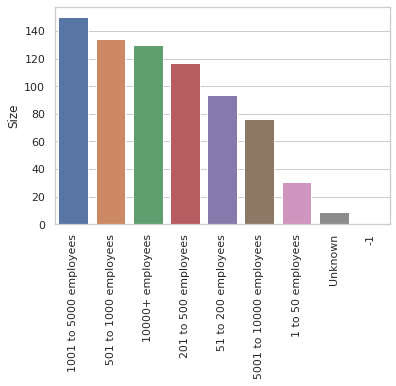

Graph for Type of ownership: total = 11


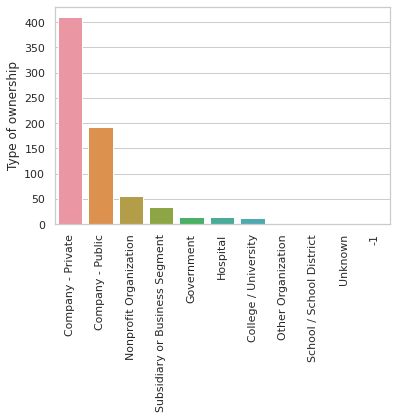

Graph for Industry: total = 60


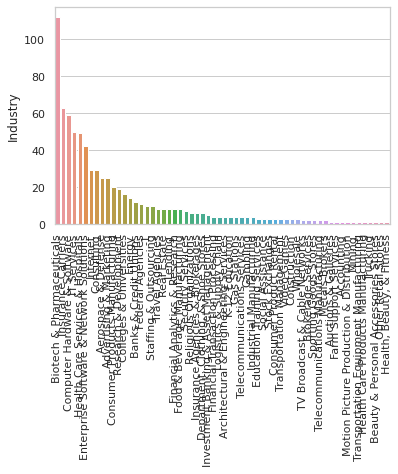

Graph for Sector: total = 25


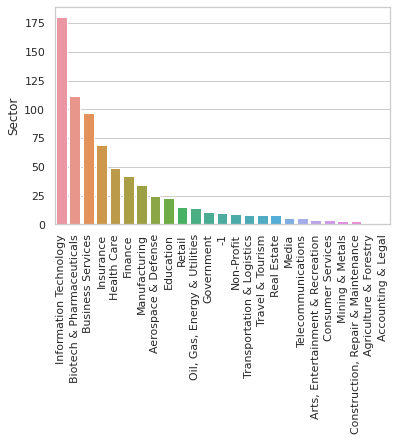

Graph for Revenue: total = 14


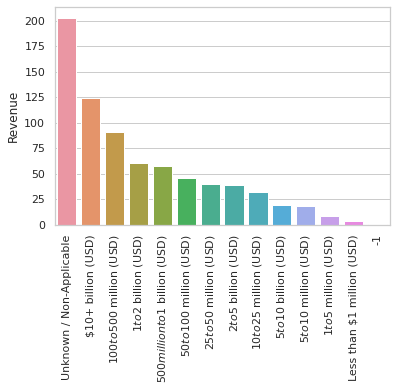

Graph for job_state: total = 37


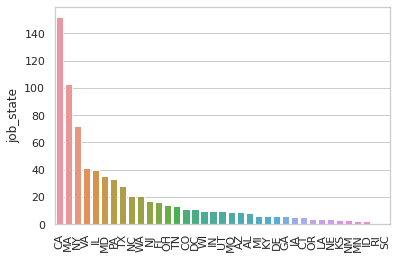

Graph for same_state: total = 2


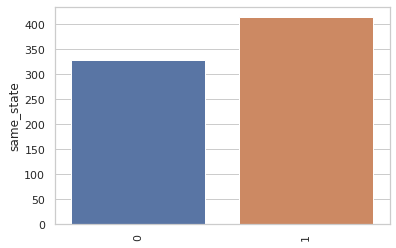

Graph for python_yn: total = 2


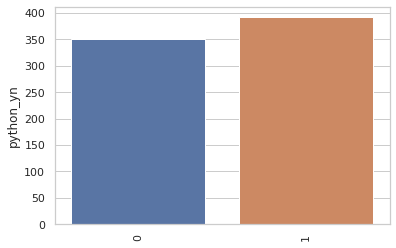

Graph for R_yn: total = 2


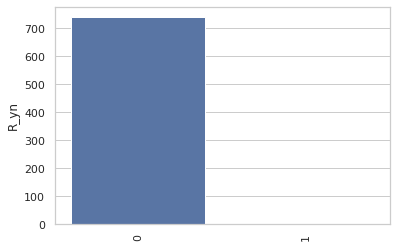

Graph for aws: total = 2


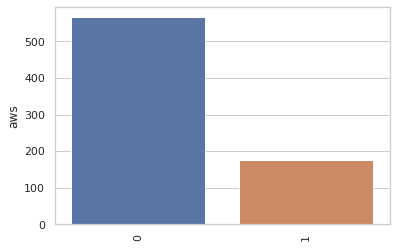

Graph for excel: total = 2


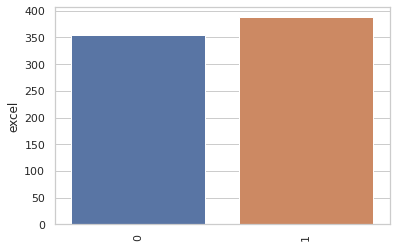

Graph for job_simpl: total = 7


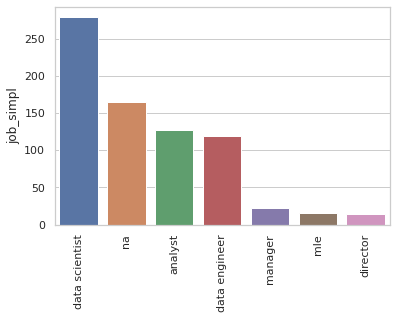

Graph for seniority: total = 3


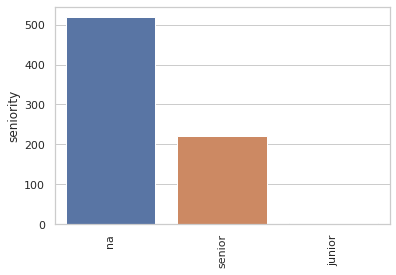

Graph for company_text: total = 343


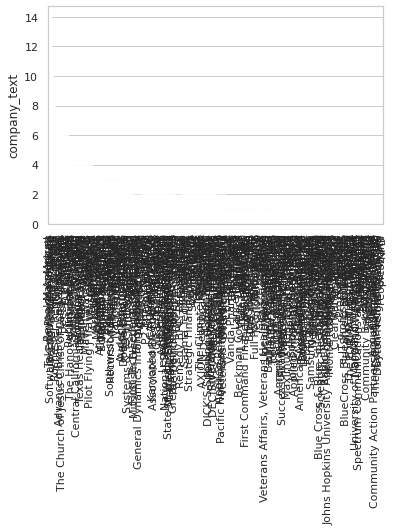

In [25]:
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.barplot(x="day", y="total_bill", data=tips)

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


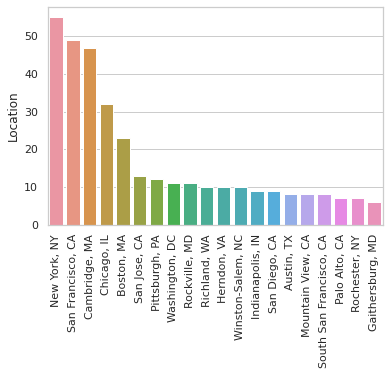

Graph for Headquarters: total = 20


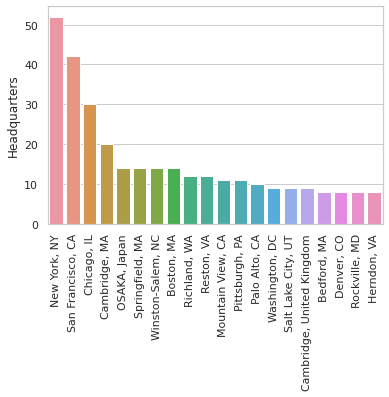

Graph for company_text: total = 20


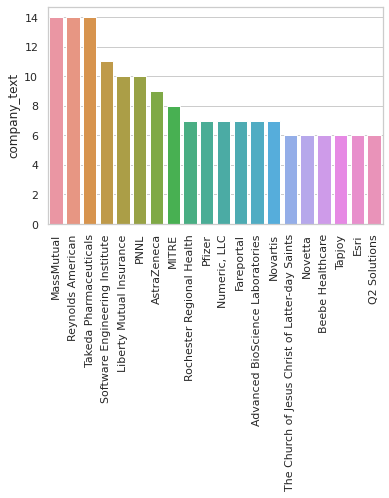

In [26]:
for i in df_cat[['Location', 'Headquarters', 'company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [27]:
pd.pivot_table(df, index=['job_simpl', 'seniority'], values='avg_salary')

avg_salary
job_simpl      seniority            
analyst        junior      53.250000
               na          66.436782
               senior      88.474359
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.958333
               senior     166.166667
na             na          72.754310
               senior     110.153061

In [28]:
pd.set_option("display.max_rows", None)

In [29]:
pd.pivot_table(df, index=['job_state', 'job_simpl'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=False)

avg_salary
job_state job_simpl                 
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       4
          data scientist          13
          data engineer            8
          analyst                  3
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        data scientist           6
          data engineer            1
          analyst                 16
          manager                  3
          na                       7
OR        data scientist           3
          data engineer            1
OH        na                       1
          data scientist           7
          analyst                  6
NY        na                      11
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 15
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       2
          analyst                  2
NC        na                      10
          data scientist           3
          data engineer            6
          analyst                  2
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        analyst                  1
          data engineer            1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      39
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                 11
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      26
          mle                      5
          manager                  9
          data scientist      

In [30]:
# Filter for data scientist

pd.pivot_table(df[df.job_simpl == 'data scientist'], index=['job_state'], values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
job_state            
DC         149.000000
CA         142.522059
UT         140.500000
MO         127.666667
IL         117.233333
NC         117.000000
NY         115.250000
MA         113.750000
WI         113.500000
PA         113.333333
MD         109.115385
CO         108.666667
VA         108.416667
NJ         106.875000
MI         106.625000
OH         105.285714
TX         100.730769
WA          99.764706
OR          98.500000
FL          97.357143
TN          96.000000
IN          84.500000
KY          84.000000
CT          84.000000
GA          81.333333
NM          74.333333
AZ          69.500000

In [31]:
# Make a pivot table and investigate further for
# Ratings, Industry, Sector, Revenue, # of Comp, Hourly, Employer provided, python, r, spark, aws, excel, Desc_len, Type of ownership 

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'aws', 'excel', 'job_simpl', 'seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [32]:
df_pivots = df[['Rating', 'Type of ownership', 'Industry', 'Sector', 'desc_length', 'num_comp',
       'hourly', 'employer_provided', 'python_yn', 'R_yn',
       'aws', 'excel', 'avg_salary', 'Revenue']]

In [33]:
df_pivots.head()

Rating   Type of ownership  ... avg_salary                           Revenue
0     3.8   Company - Private  ...       72.0         $50 to $100 million (USD)
1     3.4  Other Organization  ...       87.5            $2 to $5 billion (USD)
2     4.8   Company - Private  ...       85.0        $100 to $500 million (USD)
3     3.8          Government  ...       76.5  $500 million to $1 billion (USD)
4     2.9   Company - Private  ...      114.5          Unknown / Non-Applicable

[5 rows x 14 columns]

In [34]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))
    print('*****************************')

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
*****************************
Type of ownership
                                avg_salary
Type of ownership                         
-1                              117.500000
Company - Public                110.893782
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               101.776829
Government       

ValueError: ignored

In [35]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn                            0      1
Revenue                                      
$1 to $2 billion (USD)            16.0   44.0
$1 to $5 million (USD)             1.0    7.0
$10 to $25 million (USD)          16.0   16.0
$10+ billion (USD)                66.0   58.0
$100 to $500 million (USD)        47.0   44.0
$2 to $5 billion (USD)            17.0   22.0
$25 to $50 million (USD)          24.0   16.0
$5 to $10 billion (USD)            9.0   10.0
$5 to $10 million (USD)            9.0    9.0
$50 to $100 million (USD)         21.0   25.0
$500 million to $1 billion (USD)  29.0   28.0
-1                                 1.0    NaN
Less than $1 million (USD)         1.0    3.0
Unknown / Non-Applicable          93.0  110.0

In [36]:
# Downloads the data.
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

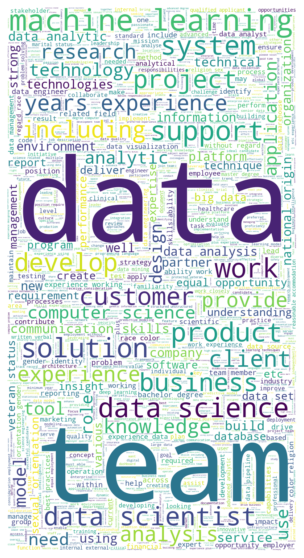

In [39]:

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()